## Multiclass classification on the Consumer complaints Dataset

**Dataset downloaded form: https://catalog.data.gov/dataset/consumer-complaint-database**

In [90]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotly.offline import iplot

In [6]:
!find /c /v "complaints.csv"

^C


### Since the number of data points is very large, only considering the required columns

In [53]:
df = pd.read_csv('complaints.csv', usecols = ['Product', 'Consumer complaint narrative'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374711 entries, 0 to 2374710
Data columns (total 2 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Product                       object
 1   Consumer complaint narrative  object
dtypes: object(2)
memory usage: 36.2+ MB


In [23]:
# df = df[['Product', 'Consumer complaint narrative']]

In [54]:
df.head()

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",NaN
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
2,"Credit reporting, credit repair services, or o...",NaN
3,Checking or savings account,NaN
4,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...


In [101]:
df1 = df.dropna(axis = 0)
df1.reset_index(drop=True)
# df1=df1.drop('index', axis = 1)

,Product,Consumer complaint narrative
0,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
1,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...
2,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
3,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
4,"Credit reporting, credit repair services, or o...",Two accounts are still on my credit history af...
...,...,...
828733,Credit card or prepaid card,"Automated calls from "" XXXX with Capital One '..."
828734,Debt collection,I have disputed my debts several times with no...
828735,Mortgage,My father died in XX/XX/XXXX. Left me his only...
828736,"Credit reporting, credit repair services, or o...",cfbp i would Like to file a complaint on Exper...


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828738 entries, 1 to 2374709
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       828738 non-null  object
 1   Consumer complaint narrative  828738 non-null  object
dtypes: object(2)
memory usage: 19.0+ MB


In [103]:
df1.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    358416
Debt collection                                                                 160799
Mortgage                                                                         85766
Credit card or prepaid card                                                      81378
Checking or savings account                                                      38576
Student loan                                                                     29321
Money transfer, virtual currency, or money service                               19260
Vehicle loan or lease                                                            15521
Bank account or service                                                          14885
Payday loan, title loan, or personal loan                                        12399
Consumer Loan                                                                     9470
Money transfers                            

**Some of the Products can be clubbed together like:**
- Consolidate “Credit reporting” into “Credit reporting, credit repair services, or other personal consumer reports”.
- Consolidate “Credit card” into “Credit card or prepaid card”.
- Consolidate “Payday loan” into “Payday loan, title loan, or personal loan”.
- Consolidate “Virtual currency” into “Money transfer, virtual currency, or money service”.  
“Other financial service” has very few number of complaints and it does not mean anything, so it is removed.

In [104]:
df1.loc[df1['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df1.loc[df1['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df1.loc[df1['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df1.loc[df1['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df1 = df1[df1.Product != 'Other financial service']

D:\Anaconda3\envs\tf-keras-gpu-test\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\Anaconda3\envs\tf-keras-gpu-test\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:title={'center':'Number complaints in each product'}>

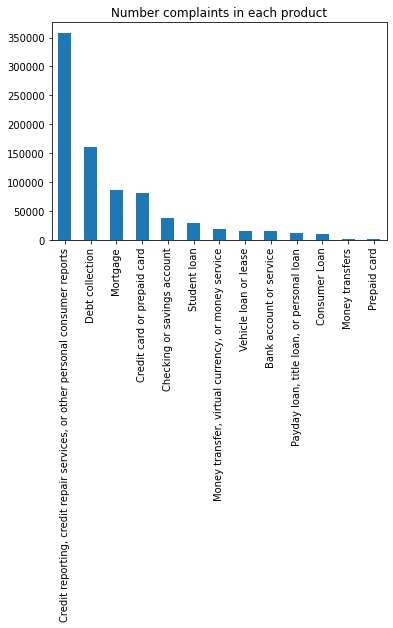

In [105]:
df1['Product'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                title='Number complaints in each product')

### Text exploration and cleaning

In [106]:
df1.head()

,Product,Consumer complaint narrative
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
4,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...
6,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
7,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
9,"Credit reporting, credit repair services, or o...",Two accounts are still on my credit history af...


In [107]:
def print_plot(index):
    example = df1.iloc[index].values
    if len(example) > 0:
        print(example[1])
        print('Product:', example[0])

In [108]:
print_plot(42)

Experian and XXXX are reporting me as 120 and 180 days past due XXXX XXXX  account that has a {$0.00} balance and {$0.00} past due. This is harming my credit score. I have disputed this directly with the two bureaus but the coding violation has not been corrected. It is impossible to be late on payments to an account that has a {$0.00} balance and {$0.00} past due amount. 

I have listed the account number for reference : XXXX
Product: Credit reporting, credit repair services, or other personal consumer reports


In [109]:
# import nltk
# nltk.download('stopwords')

In [110]:
import re
from nltk.corpus import stopwords
#regular expressions for data cleaning
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [111]:
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '') #remove retracted info
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    text = re.sub('\d+', '', text)
    return text

In [ ]:
df1['Consumer complaint narrative'] = df1['Consumer complaint narrative'].apply(clean_text)

In [ ]:
print_plot(42)

In [99]:
re.sub('\d+', '', 'my 123 name')

'my  name'